# Project: Ford GoBike Dataset
## by (Ahmed Osama)


## Table of Contents
<ul>
<li><a href="#intro"> Preliminary Wrangling</a></li>
<li><a href="#assessment"> Data Assessment</a></li>
<li><a href="#assessmentnotes">Data Assessment Notes</a></li>
<li><a href="#desc">Dataset & Analysis Description</a></li>   
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
</ul>

<a id='intro'></a>
## Preliminary Wrangling


> This data set includes 183412 records about individual rides information made in a bike-sharing system covering the greater San Francisco
Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

<a id='assessment'></a>
## Data Assessment


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

<a id='assessmentnotes'></a>
## Assessment Notes:
### Quality Assessment
- **Unneeded columns** [start_station_latitude, start_station_longitude ,end_station_latitude, end_station_longitude, bike_id , start_station_id, end_station_id]

- **Missing values** for *start_station_id*, *start_station_name*, *end_station_id*, *end_station_name*, *member_birth_year* , *member_gender*
- **Wrong datatype** for *start_time*, *end_time*, *start_station_id*, *end_station_id*,*member_birth_year*, *member_gender*, *bike_share_for_all_trip*, *user_type* columns 



### Tidiness

- **Extracting** the `Day`, `Hour` from start_date column in individual column for analysis purpose
- **Making a new column for the age**
- **Making a new column for** `duration_minute` values in minutes instead of seconds.

## Data Cleaning

In [10]:
# copying the dataset
df_copy = df.copy()

In [11]:
# First of all, Drop all unneeded columns
df_copy = df_copy.drop(['start_station_latitude', 'start_station_longitude',
              'end_station_latitude', 'end_station_longitude', 'bike_id', 'start_station_id', 'end_station_id' ], axis = 1)

In [12]:
# now we will drop the records that have null values for columns
# [start_station_name & end_station_name] as they are only 197 record
# and they will not affect our analysis.

# Getting the index of those columns.
start_null_index = df_copy[df_copy['start_station_name'].isnull()].index.tolist()

# Dropping those rows.
df_copy.drop(start_null_index, axis = 0, inplace= True)

# checking if there is null values remain
df_copy.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_name            0
end_station_name              0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [13]:
# Filling the missing values in gender column 
# by filling it with `other`.

df_copy['member_gender'].fillna('Other', inplace = True)
# test
df_copy.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_name            0
end_station_name              0
user_type                     0
member_birth_year          8263
member_gender                 0
bike_share_for_all_trip       0
dtype: int64

> For the `member_birth_year coulmn` **missing values problem**. We can't solve this either by dropping the null values or filling them by a default values because it will affect the analysis. So, we will just leave them as they are.

In [14]:
# fix multiple columns with wrong data type.

df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])
df_copy['user_type'] = df_copy['user_type'].astype('category')
df_copy['member_gender'] = df_copy['member_gender'].astype('category')
df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype('category')


In [15]:
# Test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   end_station_name         183215 non-null  object        
 5   user_type                183215 non-null  category      
 6   member_birth_year        174952 non-null  float64       
 7   member_gender            183215 non-null  category      
 8   bike_share_for_all_trip  183215 non-null  category      
dtypes: category(3), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 10.3+ MB


In [16]:
# add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

df_copy['duration_minute'] = df_copy['duration_sec']/60
df_copy['duration_minute'] = df_copy['duration_minute'].astype(int)

df_copy['start_date'] = df_copy.start_time.dt.strftime('%Y-%m-%d')
df_copy['start_hour'] = df_copy.start_time.dt.strftime('%H')
df_copy['start_day'] = df_copy.start_time.dt.strftime('%A')


In [17]:
# Test
df_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour,start_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869,2019-02-28,17,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,Other,No,708,2019-02-28,18,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030,2019-02-28,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608,2019-02-28,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26,2019-02-28,23,Thursday


In [18]:
# add a new column for age.
# calculating it from'member_birth_year'

df_copy['member_age'] = 2021 - df_copy['member_birth_year']
# Test
df_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour,start_day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869,2019-02-28,17,Thursday,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,Other,No,708,2019-02-28,18,Thursday,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030,2019-02-28,12,Thursday,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608,2019-02-28,17,Thursday,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26,2019-02-28,23,Thursday,47.0


<a id='desc'></a>

## Dataset & Analysis Description

### What is the structure of your dataset?

> The original combined data contains approximately 183412 bike trip records with 16 columns. But they have been decreased during the cleaning step. The variables describe 3 major categories:

> `Trip duration`: duration_sec, start_time, end_time

> `Station info`: start_station_name, end_station_name

> `Member info` : user_type, member_birth_year, member_gender, bike_share_for_all_trip


> `Extracted columns`: duration_minute, start_date, start_hour, start_day, member_age

### What is/are the main feature(s) of interest in your dataset?

> I am intersting in investegation the trip durations. Also most rush hours, days and months. Member types and genders.
**Sample questions to answer**: When are most trips taken in terms of hour of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer? Male or female?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Each trip's start date/time and duration, user type, gender and age

<a id='uni'></a>
## Univariate Exploration


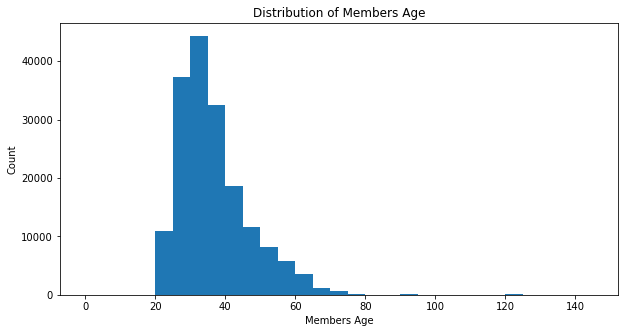

In [19]:
# Looking at the distribution of the Age
plt.figure(figsize= [10,5])
bins = np.arange(0, df_copy['member_age'].max()+5, 5)
plt.hist(data = df_copy, x='member_age', bins= bins, linestyle = 'dashed');
plt.xlabel('Members Age')
plt.ylabel('Count')
plt.title('Distribution of Members Age');


> <span style="color:red"> By visual looking,The biggest part of members are in 30:50 years. Also there are some `outliers` above the age of 75. Let's remove them. </span>

In [20]:
# Remove the outliers.
df_copy = df_copy.query('member_age <= 75')

# Converting the column type to Integer.
df_copy['member_age'] = df_copy['member_age'].astype(int)

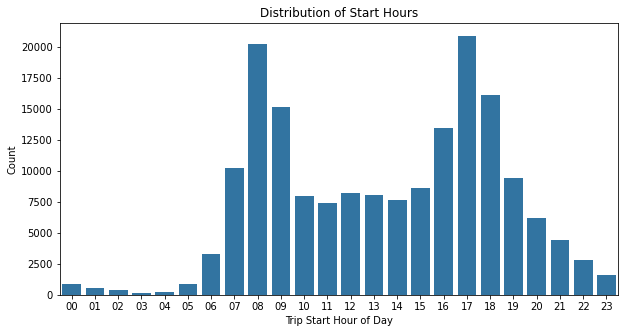

In [21]:
# Trip distribution over day hours

# Ordering them from maximum to minimum.
hour_order = df_copy['start_hour'].value_counts().index
hour_order = sorted(hour_order)

base_color = sb.color_palette()[0]
plt.figure(figsize=[10,5])
sb.countplot(data=df_copy, x='start_hour', color=base_color, order = hour_order);
plt.title('Distribution of Start Hours');
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

> <span style="color:red"> It seems that the `Rush Hour` over all time is 17, and 8 also is very close </span>


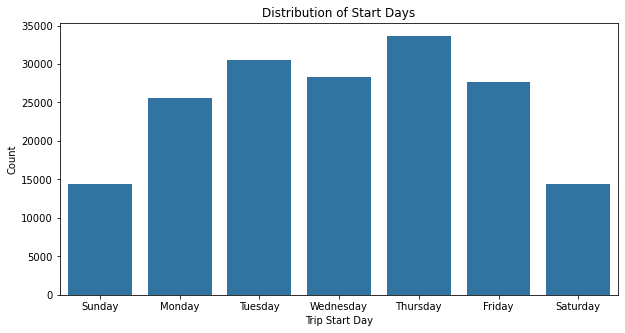

In [22]:
# Trip distribution over week days
# Converting `start_day` to category data type for the ease of plotting.

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaytype = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
df_copy['start_day'] = df_copy['start_day'].astype(weekdaytype)

# Ordering them.
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


plt.figure(figsize= [10,5])
sb.countplot(data=df_copy, x='start_day', color=base_color, order= days_order);
plt.title('Distribution of Start Days');
plt.xlabel('Trip Start Day');
plt.ylabel('Count');

> <span style="color:red"> Thursday is the day with the biggest number of trips over all time. </span>


> <span style="color:red"> The trip distribution over day hours peaks is located within two time frames, `8am-9am and 17pm-18pm`, during typical rush hours. Looking in trip distribution over day of week plot, it is surprising that  that the majority of rides happened on work days `Thursday-Tuesday` and primary usage is probably for commuting. </span>



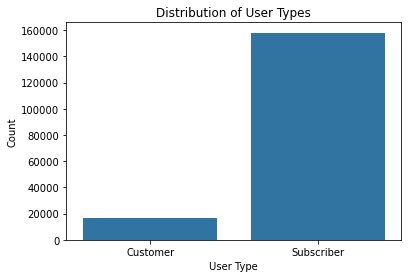

In [23]:
sb.countplot(data=df_copy, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Distribution of User Types');

><span style="color:red"> The Majority of the riders are Subscriber Type </span>

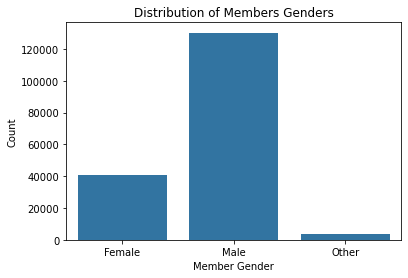

In [24]:
sb.countplot(data=df_copy, x='member_gender', color=base_color);
plt.xlabel('Member Gender');
plt.ylabel('Count');
plt.title('Distribution of Members Genders');

><span style="color:red"> The Majority of the riders are Males  </span>

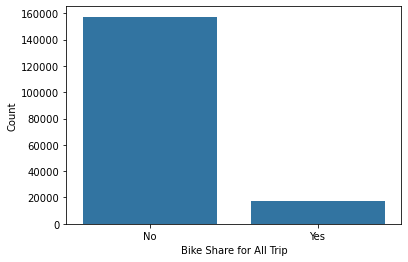

In [25]:
sb.countplot(data=df_copy, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

><span style="color:red"> The Majority of the riders didn't use bike share for all of the trips </span>

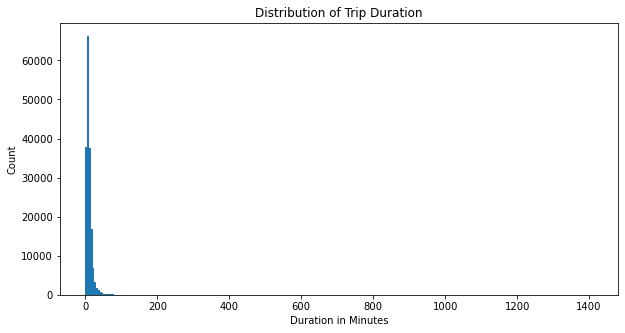

In [26]:
plt.figure(figsize= [10,5])
bins = np.arange(0, df_copy['duration_minute'].max()+5, 5)
plt.hist(data = df_copy, x='duration_minute', bins= bins, linestyle = 'dashed');
plt.xlabel('Duration in Minutes')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration');


><span style="color:red">  It's surprising to see the duration distribution values far to the right (which means there are some trips with very long time). while the majority of the trips were short (within 60 mins).So , I  will zoom into the majority of trips durations. </span>

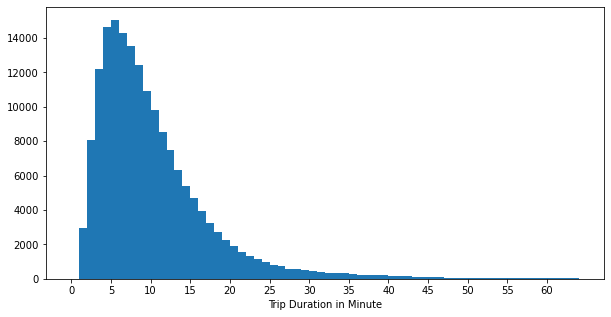

In [27]:
plt.figure(figsize= [10,5])
bins = np.arange(0, 65, 1)
ticks = np.arange(0, 65, 5)
plt.hist(data=df_copy, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

> <span style="color:red">  It seems like the riders doesn't love to make more than `30 minutes` trip duration, most of them fell between 5 to 15 minutes range. Let's remove all of the trips above 60 because they are considered as outliers. </span>

In [28]:
df_copy = df_copy.query('duration_minute <= 60')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the Duration and times. The Most of trips have a rush hour range around `8-9am` and `17-18pm` during a day, there were more trips on work days `(Thursday - Tuesday)` working days compared to weekends. Most of trips were within `30 Minutes Duration` and the peaks within `5 to 15 Minutes`.

> For the members, there were more `Male riders than Female`, and most members were `Subscribers` not `Customers`. The majority of the members `did not use bike share for all of their trips`, and most of the riders were around `30 to 50` years old.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> I have extracted some new columns to help in the analysis like age, start_hour, start_day.
> The distripution of the trip durations was surprising. So, I had to focus on the majority of trips in the plot.
> There were many outliers in the age, I removed them. 
  

<a id='bi'></a>
## Bivariate Exploration


> **How does the trip duration distribution vary between customers and subscribers?**
> **How does the trip duration distribution vary between Males and Females?**

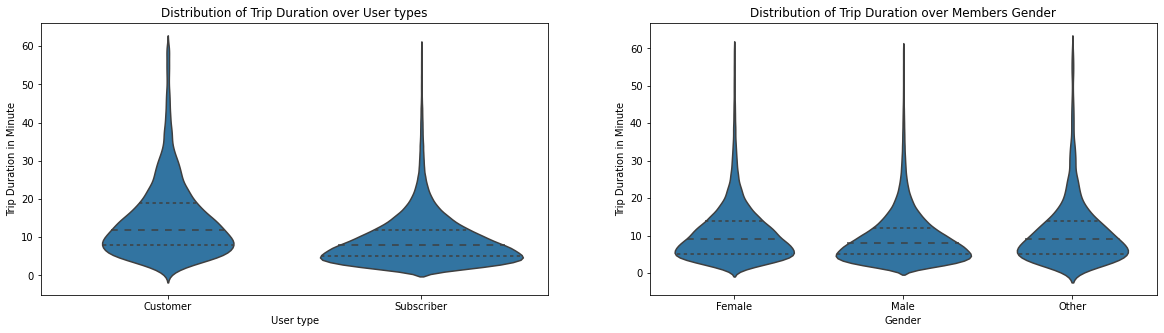

In [29]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,2)
sb.violinplot(data=df_copy, x='member_gender', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.title('Distribution of Trip Duration over Members Gender');


plt.subplot(1,2,1)
sb.violinplot(data=df_copy, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User type');
plt.ylabel('Trip Duration in Minute');
plt.title('Distribution of Trip Duration over User types');



> > <span style="color:red"> It seems that the gender doesn't affect so much on the duration compared to the User type. the genders are all close to each other. But for the types, the majority of the subscribers take a `1 to 10` trip duration. And the majority of the customer take a `8 to 20` trip duration </span>

> **What is the Average Age for the User Types?**

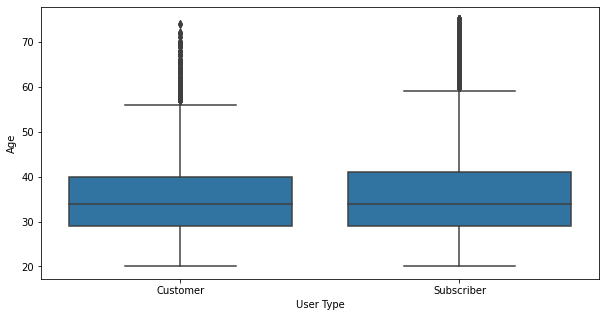

In [30]:
plt.figure(figsize=[10,5])

sb.boxplot(data=df_copy, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Age');

> > <span style="color:red"> The Subscribers have a little higher average age than the customers type. </span>

> **What is the average trip duration during the week days?**

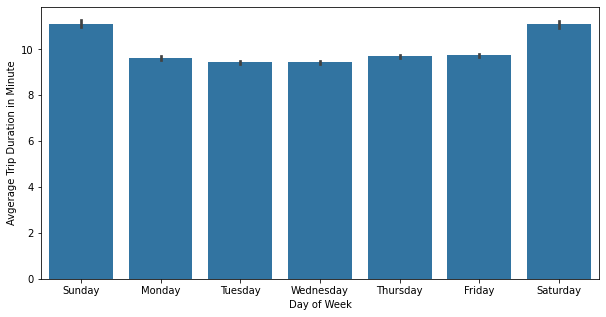

In [31]:
plt.figure(figsize=[10,5])
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

sb.barplot(data=df_copy, x='start_day', y='duration_minute', color=base_color, order = days_order);
plt.xlabel('Day of Week');
plt.ylabel('Avgerage Trip Duration in Minute');

> > <span style="color:red"> It seems that it doesn't differ so much from day to a different one. Except for Saturday and Sunday, they have a higher average duration than the other days. </span>

> **What is the member ages duration during the week days?**

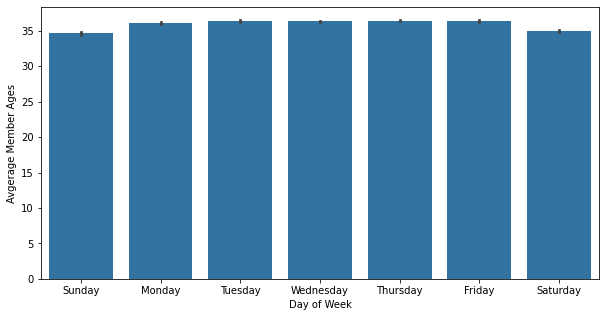

In [32]:
plt.figure(figsize=[10,5])
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

sb.barplot(data=df_copy, x='start_day', y='member_age', color=base_color, order= days_order);
plt.xlabel('Day of Week');
plt.ylabel('Avgerage Member Ages');

> > <span style="color:red"> It seems like it doesn't differ so much from day to a different one. Except for Saturday and Sunday, they have a lower average ages than the other days. </span>

> **What is the average trip duration for the members age?**

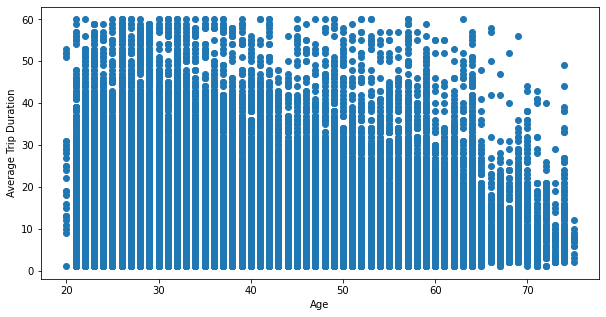

In [33]:
plt.figure(figsize=[10,5])
plt.scatter(data = df_copy, x = 'member_age', y = 'duration_minute');
plt.xlabel('Age')
plt.ylabel('Average Trip Duration');

> > <span style="color:red"> That's not surprising at all. As the age increases, the trip duration dicreases. I expected the age to be affecting more than the plot shows. But it seems that the older people in San Fransisco have a good health! </span>

> **What is the distribution of genders over the week days?**

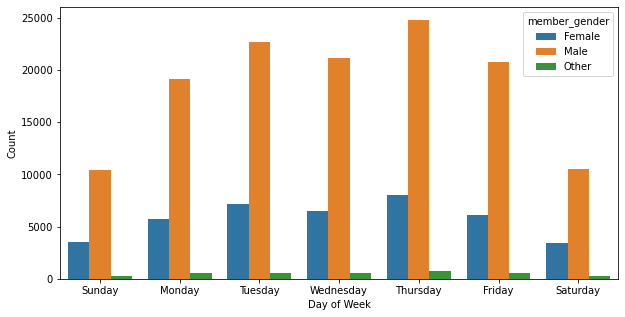

In [34]:
plt.figure(figsize=[10,5])
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

sb.countplot(data=df_copy, x='start_day', hue='member_gender', order = days_order);
plt.xlabel('Day of Week');
plt.ylabel('Count');

> > <span style="color:red"> This plot isn't fair enough because the number of Males is much bigger than the others. But, from this plot. The peak for all genders is `Thursday` in San Fransisco!, In general the number of trips increases for the weekends. and goes lower in the working days. </span>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The `gender` doesn't affect so much on the trip duration compared to the `User type`, Also the average trip durations are almost the same over the week days except for `Saturday and Sunday`, They have a higher average. Also the Age doesn't affect the trip duration so much. just a litte effect for the older ages. Also the Subscribers user type have a little high average ages than the Customer types.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, I didn't find interesting relationships between other features.

<a id='multi'></a>
## Multivariate Exploration


> **Distribution of Average Trip Duration over Members Ages for Member Genders**

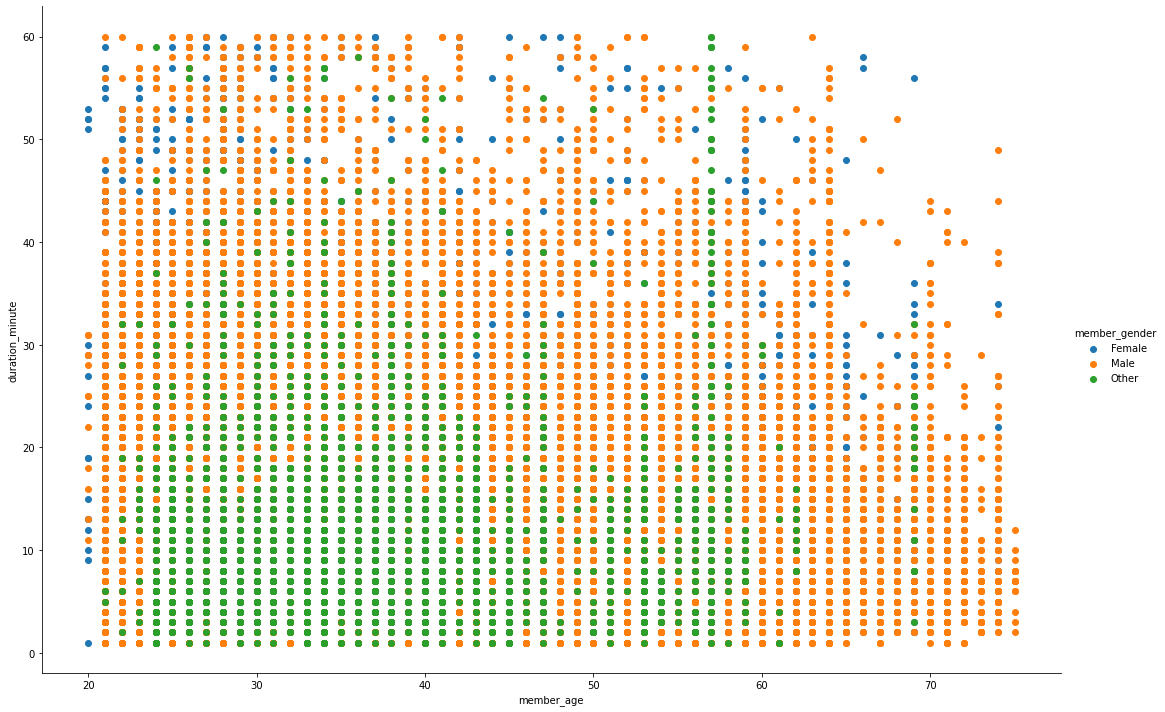

In [37]:
g = sb.FacetGrid(data = df_copy, hue = 'member_gender', size = 10,
                 aspect = 1.5)
g.map(plt.scatter, 'member_age', 'duration_minute')
g.add_legend();

> > <span style="color:red"> This plot is inspiring! it shows that majority  of the `other` type of genders are between `25 to 50` years old, and they spend from `5 to 30` minutes in the trip. But for females due to the very small number of them there is no interesting insights.</span>

> **Distribution of Average Trip Duration over Members Ages for User types**

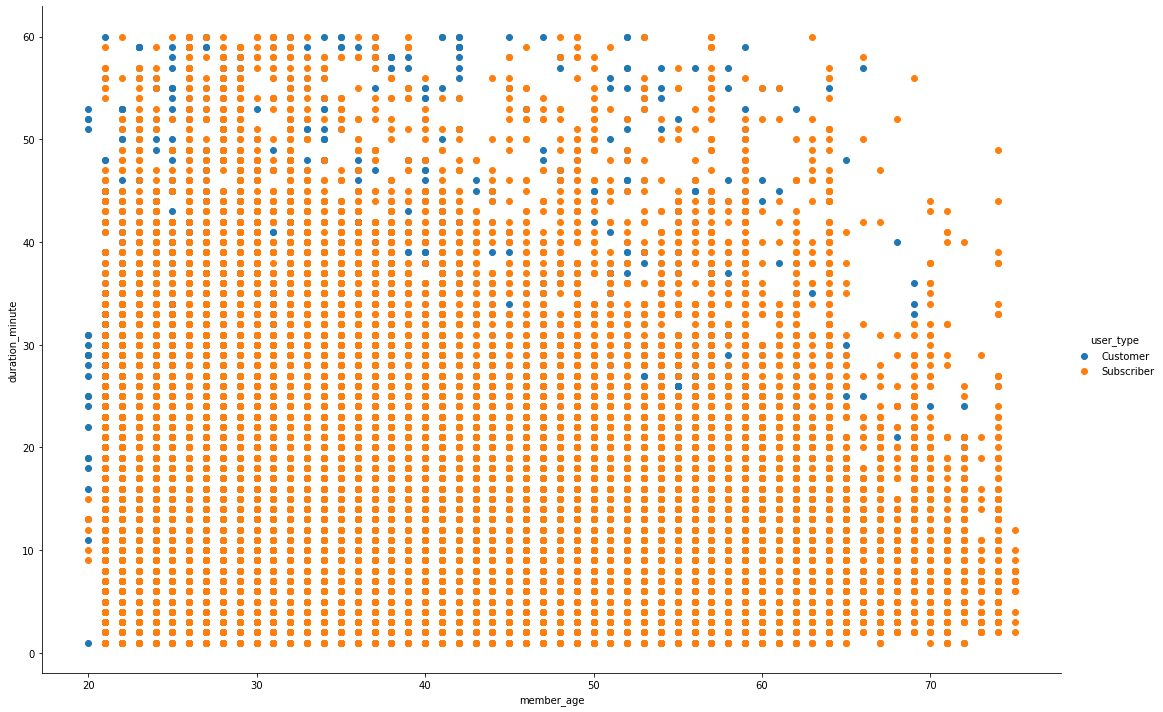

In [36]:
g = sb.FacetGrid(data = df_copy, hue = 'user_type', size = 10,
                 aspect = 1.5)
g.map(plt.scatter, 'member_age', 'duration_minute')
g.add_legend();

> > <span style="color:red"> As we see, due to the very small number of the customers type. We couldn't notice many interesting insights about this distribution! except that the majority of the customers type have a higher trip duration average compared to the Subscribers.</span>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration and it discovered some new insights, the relationship between the multiple variables `Age - Duration - Gender- User type` are plotted. Showing some new insights like the average age for the `Other` gender type and the average duration trip.

### Were there any interesting or surprising interactions between features?

> No